<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install akshare

In [2]:
!pip install datetime

In [3]:
!pip install ta

In [4]:
import akshare as ak
import pandas as pd
from datetime import datetime

# 设置查询的股票代码和起始日期
stock_code = 'sz300502'
start_date = '2022-01-01'  # 2022年1月1日
end_date = '2024-07-02'  # 2024年7月2日
adjust = 'qfq' # "": 返回未复权的数据 / qfq: 返回前复权后的数据 / hfq: 返回后复权后的数据 / qfq-factor: 返回前复权因子和调整 / hfq-factor: 返回后复权因子和调整

# 使用AKShare的港股行情数据接口
# 注意：这里使用的函数名和数据字段可能随AKShare库的更新而变化
# 以下是一个示例函数，具体使用时请参考AKShare的最新文档
# df = ak.stock_zh_a_daily(symbol=stock_code, adjust=adjust)

try:
    all_data = ak.stock_zh_a_daily(symbol=stock_code, adjust=adjust)
    df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
    # 打印部分数据以验证
    print(df[['date', 'open', 'high', 'low', 'close', 'volume']])
except Exception as e:
    print(f"数据获取失败：{e}")


df_renamed = df.copy()
# 如果需要，将列名更改为首字母大写
df_renamed.columns = [col.capitalize() for col in df_renamed.columns]

# 打印结果
print(df_renamed)

            date    open    high     low   close      volume
1421  2022-01-04   27.76   28.52   26.88   27.91  13005938.0
1422  2022-01-05   27.69   28.15   26.47   26.93  11476350.0
1423  2022-01-06   26.66   27.96   26.66   27.18  15838177.0
1424  2022-01-07   27.18   27.64   26.23   26.25   9550925.0
1425  2022-01-10   26.30   27.49   25.81   27.38  10667414.0
...          ...     ...     ...     ...     ...         ...
2019  2024-06-26  108.08  110.46  107.60  108.61  27442826.0
2020  2024-06-27  106.54  107.98  104.10  105.04  18740794.0
2021  2024-06-28  104.69  107.86  104.31  105.55  19237563.0
2022  2024-07-01  104.60  111.68  104.60  110.33  29510204.0
2023  2024-07-02  110.36  115.00  108.18  112.95  31901166.0

[603 rows x 6 columns]
            Date    Open    High     Low   Close      Volume        Amount  \
1421  2022-01-04   27.76   28.52   26.88   27.91  13005938.0  5.069459e+08   
1422  2022-01-05   27.69   28.15   26.47   26.93  11476350.0  4.389255e+08   
1423  2022

In [5]:
import matplotlib.pyplot as plt
import ta


import akshare as ak
import pandas as pd
from datetime import datetime

# 设置查询的股票代码和起始日期
stock_code = 'sz300502'
start_date = '2022-01-01'  # 2022年1月1日
end_date = '2024-07-03'  # 2024年7月2日
adjust = 'qfq' # "": 返回未复权的数据 / qfq: 返回前复权后的数据 / hfq: 返回后复权后的数据 / qfq-factor: 返回前复权因子和调整 / hfq-factor: 返回后复权因子和调整

# 使用AKShare的港股行情数据接口
# 注意：这里使用的函数名和数据字段可能随AKShare库的更新而变化
# 以下是一个示例函数，具体使用时请参考AKShare的最新文档
# df = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)

try:
    all_data = ak.stock_zh_a_daily(symbol=stock_code, adjust=adjust)
    # 打印部分数据以验证
    filtered_df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
    # 重置索引
    filtered_df.reset_index(drop=True, inplace=True)
    data = filtered_df.copy()
    print(data[['date', 'open', 'high', 'low', 'close', 'volume']])

    data.columns = [col.capitalize() for col in data.columns]
    #data.set_index('Date', drop=True, inplace=True)
except Exception as e:
    print(f"数据获取失败：{e}")


data.head()

           date    open    high     low   close      volume
0    2022-01-04   27.76   28.52   26.88   27.91  13005938.0
1    2022-01-05   27.69   28.15   26.47   26.93  11476350.0
2    2022-01-06   26.66   27.96   26.66   27.18  15838177.0
3    2022-01-07   27.18   27.64   26.23   26.25   9550925.0
4    2022-01-10   26.30   27.49   25.81   27.38  10667414.0
..          ...     ...     ...     ...     ...         ...
599  2024-06-27  106.54  107.98  104.10  105.04  18740794.0
600  2024-06-28  104.69  107.86  104.31  105.55  19237563.0
601  2024-07-01  104.60  111.68  104.60  110.33  29510204.0
602  2024-07-02  110.36  115.00  108.18  112.95  31901166.0
603  2024-07-03  111.01  112.72  108.57  109.99  18968905.0

[604 rows x 6 columns]


,Date,Open,High,Low,Close,Volume,Amount,Outstanding_share,Turnover
0,2022-01-04,27.76,28.52,26.88,27.91,13005938.0,506945887.0,439115229.0,0.029619
1,2022-01-05,27.69,28.15,26.47,26.93,11476350.0,438925475.0,439115229.0,0.026135
2,2022-01-06,26.66,27.96,26.66,27.18,15838177.0,610375184.0,439115229.0,0.036068
3,2022-01-07,27.18,27.64,26.23,26.25,9550925.0,359994634.0,439115229.0,0.021750
4,2022-01-10,26.30,27.49,25.81,27.38,10667414.0,404142068.0,439115229.0,0.024293


In [6]:
import matplotlib.pyplot as plt
import ta


import akshare as ak
import pandas as pd
from datetime import datetime

# 设置查询的股票代码和起始日期
stock_code = 'sz300502'
start_date = '2022-01-01'  # 2022年1月1日
end_date = '2024-07-03'  # 2024年7月2日
adjust = 'qfq' # "": 返回未复权的数据 / qfq: 返回前复权后的数据 / hfq: 返回后复权后的数据 / qfq-factor: 返回前复权因子和调整 / hfq-factor: 返回后复权因子和调整

# 使用AKShare的港股行情数据接口
# 注意：这里使用的函数名和数据字段可能随AKShare库的更新而变化
# 以下是一个示例函数，具体使用时请参考AKShare的最新文档
# df = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)

try:
    all_data = ak.stock_zh_a_daily(symbol=stock_code, adjust=adjust)
    # 打印部分数据以验证
    filtered_df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
    # 重置索引
    filtered_df.reset_index(drop=True, inplace=True)
    data = filtered_df.copy()
    print(data[['date', 'open', 'high', 'low', 'close', 'volume']])

    data.columns = [col.capitalize() for col in data.columns]
    data.set_index('Date', drop=True, inplace=True)
except Exception as e:
    print(f"数据获取失败：{e}")


data.head()

           date    open    high     low   close      volume
0    2022-01-04   27.76   28.52   26.88   27.91  13005938.0
1    2022-01-05   27.69   28.15   26.47   26.93  11476350.0
2    2022-01-06   26.66   27.96   26.66   27.18  15838177.0
3    2022-01-07   27.18   27.64   26.23   26.25   9550925.0
4    2022-01-10   26.30   27.49   25.81   27.38  10667414.0
..          ...     ...     ...     ...     ...         ...
599  2024-06-27  106.54  107.98  104.10  105.04  18740794.0
600  2024-06-28  104.69  107.86  104.31  105.55  19237563.0
601  2024-07-01  104.60  111.68  104.60  110.33  29510204.0
602  2024-07-02  110.36  115.00  108.18  112.95  31901166.0
603  2024-07-03  111.01  112.72  108.57  109.99  18968905.0

[604 rows x 6 columns]


,Open,High,Low,Close,Volume,Amount,Outstanding_share,Turnover
Date,,,,,,,,
2022-01-04,27.76,28.52,26.88,27.91,13005938.0,506945887.0,439115229.0,0.029619
2022-01-05,27.69,28.15,26.47,26.93,11476350.0,438925475.0,439115229.0,0.026135
2022-01-06,26.66,27.96,26.66,27.18,15838177.0,610375184.0,439115229.0,0.036068
2022-01-07,27.18,27.64,26.23,26.25,9550925.0,359994634.0,439115229.0,0.021750
2022-01-10,26.30,27.49,25.81,27.38,10667414.0,404142068.0,439115229.0,0.024293


In [7]:
import pandas as pd

def calculate_biasvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return (df['Volume'] - df['Volume'].rolling(window=period).mean()) / df['Volume'].rolling(window=period).mean() * 100

def BIASVOL_signal(df, para=[6, 12, 24]):
    """
    根据BIASVOL的量化策略生成交易信号。
    参数para定义了BIASVOL计算时使用的周期。
    """
    # 计算不同周期的BIASVOL
    for p in para:
        df[f'BIASVOL{p}'] = calculate_biasvol(df, p)

    # 根据BIASVOL的值生成交易信号
    df['signal'] = 0  # 初始化信号为0（无信号）
    buy_conditions = (df['BIASVOL6'] > 5) & (df['BIASVOL12'] > 7) & (df['BIASVOL24'] > 11)
    sell_conditions = (df['BIASVOL6'] < -5) & (df['BIASVOL12'] < -7) & (df['BIASVOL24'] < -11)

    df.loc[buy_conditions, 'signal'] = 1  # 买入信号
    df.loc[sell_conditions, 'signal'] = -1  # 卖出信号

    return df

# 示例使用
# 假设df是一个包含'Close'和'Volume'列的DataFrame
# 这里我们创建一个模拟的DataFrame来测试函数
import numpy as np
np.random.seed(0)
dates = pd.date_range('20230101', periods=100)
df = pd.DataFrame(data=np.random.randint(100, 1000, size=(100, 2)), index=dates, columns=['Close', 'Volume'])

# 调用函数并打印结果
df = BIASVOL_signal(df)
print(df[['Close', 'Volume', 'BIASVOL6', 'BIASVOL12', 'BIASVOL24', 'signal']].tail(10))

            Close  Volume    BIASVOL6  BIASVOL12   BIASVOL24  signal
2023-04-01    980     396  -16.012725  -6.640472  -10.407240       0
2023-04-02    428     119  -72.131148 -71.873153  -72.136585      -1
2023-04-03    707     940  103.978300  94.852306  114.530240       1
2023-04-04    510     550   22.222222  10.663984   21.737527       1
2023-04-05    348     280  -36.699322 -39.892665  -34.655776      -1
2023-04-06    423     929   73.428749  78.797113  104.475422       1
2023-04-07    882     964   52.934955  74.981092  103.715770       1
2023-04-08    360     849   12.898936  44.020356   68.885205       1
2023-04-09    239     698   -1.920375  19.061834   40.090316       0
2023-04-10    561     989   26.014016  60.183561   96.669152       1


In [8]:
df = BIASVOL_signal(data)
print(df[['Close', 'Volume', 'BIASVOL6', 'BIASVOL12', 'BIASVOL24', 'signal']].tail(100))

             Close      Volume   BIASVOL6  BIASVOL12  BIASVOL24  signal
Date                                                                   
2024-01-30   42.99  44558234.0 -19.112648 -18.389762  -0.085531       0
2024-01-31   42.40  44891205.0 -14.549441 -16.359938  -0.922908       0
2024-02-01   45.47  59958830.0  14.870126   7.426544  29.776445       1
2024-02-02   45.50  48733839.0  -2.552916 -12.552176   4.824083       0
2024-02-05   46.32  56998259.0   8.520796   4.234832  19.771969       0
...            ...         ...        ...        ...        ...     ...
2024-06-27  105.04  18740794.0 -17.959430 -32.807686 -32.445893      -1
2024-06-28  105.55  19237563.0 -14.399694 -31.862519 -27.862818      -1
2024-07-01  110.33  29510204.0  24.907697   3.978285  11.167570       0
2024-07-02  112.95  31901166.0  23.123718  21.062542  20.306500       1
2024-07-03  109.99  18968905.0 -21.939443 -23.574838 -27.980779      -1

[100 rows x 6 columns]


In [9]:
def calculate_meanvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return df['Volume'].rolling(window=period).mean()

para=[6, 12, 24]

# 计算不同周期的BIASVOL
for p in para:
    data[f'MEANVOL{p}'] = calculate_meanvol(data, p)
for p in para:
    print(data[f'MEANVOL{p}'].tail(10))

Date
2024-06-20    3.399320e+07
2024-06-21    3.313664e+07
2024-06-24    2.679211e+07
2024-06-25    2.534023e+07
2024-06-26    2.356158e+07
2024-06-27    2.284332e+07
2024-06-28    2.247371e+07
2024-07-01    2.362561e+07
2024-07-02    2.590985e+07
2024-07-03    2.430024e+07
Name: MEANVOL6, dtype: float64
Date
2024-06-20    2.759038e+07
2024-06-21    2.747336e+07
2024-06-24    2.754527e+07
2024-06-25    2.737220e+07
2024-06-26    2.771212e+07
2024-06-27    2.789128e+07
2024-06-28    2.823345e+07
2024-07-01    2.838112e+07
2024-07-02    2.635098e+07
2024-07-03    2.482024e+07
Name: MEANVOL12, dtype: float64
Date
2024-06-20    2.900290e+07
2024-06-21    2.874344e+07
2024-06-24    2.788322e+07
2024-06-25    2.812038e+07
2024-06-26    2.837102e+07
2024-06-27    2.774190e+07
2024-06-28    2.666803e+07
2024-07-01    2.654569e+07
2024-07-02    2.651658e+07
2024-07-03    2.633867e+07
Name: MEANVOL24, dtype: float64


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
def get_stock_data(symbol, start_date, end_date):
    try:
        all_data = ak.stock_zh_a_daily(symbol=stock_code, adjust=adjust)
        # 打印部分数据以验证
        filtered_df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
        # 重置索引
        filtered_df.reset_index(drop=True, inplace=True)
        data = filtered_df.copy()
        print(data[['date', 'open', 'high', 'low', 'close', 'volume']])

        data.columns = [col.capitalize() for col in data.columns]
        data.set_index('Date', drop=True, inplace=True)
        return data
    except Exception as e:
        print("Invalid input! Please enter a valid stock symbol, start date, and end date.")
        print(f"数据获取失败：{e}")
        return None

In [12]:
def calculate_macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal


def calculate_biasvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return (df['Volume'] - df['Volume'].rolling(window=period).mean()) / df['Volume'].rolling(window=period).mean() * 100

def BIASVOL_signal(df, para=[6, 12, 24]):
    """
    根据BIASVOL的量化策略生成交易信号。
    参数para定义了BIASVOL计算时使用的周期。
    """
    # 计算不同周期的BIASVOL
    for p in para:
        df[f'BIASVOL{p}'] = calculate_biasvol(df, p)

    # 根据BIASVOL的值生成交易信号
    df['signal'] = 0  # 初始化信号为0（无信号）
    buy_conditions = (df['BIASVOL6'] > 5) & (df['BIASVOL12'] > 7) & (df['BIASVOL24'] > 11)
    sell_conditions = (df['BIASVOL6'] < -5) & (df['BIASVOL12'] < -7) & (df['BIASVOL24'] < -11)

    df.loc[buy_conditions, 'signal'] = 1  # 买入信号
    df.loc[sell_conditions, 'signal'] = -1  # 卖出信号

    return df


In [13]:
def generate_signals(data):
    df = BIASVOL_signal(data)
    return df['signal']

def simulate_trades(data, signals, initial_money):
    num_shares = 0
    cash_balance = initial_money
    dates_bought = []
    dates_sold = []
    for i in range(len(data)):
        if signals[i] == 1 and cash_balance > 0:
            num_shares = cash_balance / data['Close'][i]
            cash_balance = 0
            dates_bought.append(data.index[i])
            print(f"Buy {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
        elif signals[i] == -1 and num_shares > 0:
            sell_price = data['Close'][i]
            cash_balance = num_shares * sell_price
            num_shares = 0
            dates_sold.append(data.index[i])
            print(f"Sell {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
    return cash_balance if num_shares == 0 else num_shares * data['Close'][-1], dates_bought, dates_sold

In [14]:
def plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(data['Close'], label='Price')
    ax.scatter(dates_bought, data.loc[dates_bought]['Close'], marker='^', color='green', label='Buy')
    ax.scatter(dates_sold, data.loc[dates_sold]['Close'], marker='v', color='red', label='Sell')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f"{symbol} Stock Price ({start_date} to {end_date})")
    plt.savefig("plot.png")


def main():
    symbol = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    initial_money = float(input("Enter the initial amount of money: "))

    data = get_stock_data(symbol, start_date, end_date)
    if data is None:
        return

    signals = generate_signals(data)
    print(signals)
    final_balance, dates_bought, dates_sold = simulate_trades(data, signals, initial_money)

    print(f"Final balance: ${final_balance:.2f}")
    print(f"Profit/Loss: ${final_balance - initial_money:.2f}")

    plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold)

Enter the stock ticker symbol: sz300502
Enter the start date (YYYY-MM-DD): 2024-01-01
Enter the end date (YYYY-MM-DD): 2024-07-03
Enter the initial amount of money: 50000
           date    open    high     low   close      volume
0    2024-01-02   48.76   50.35   47.80   47.97  30648429.0
1    2024-01-03   47.50   47.74   45.45   46.52  39925614.0
2    2024-01-04   46.69   47.93   45.88   47.58  36782357.0
3    2024-01-05   47.29   47.29   44.44   44.72  38278473.0
4    2024-01-08   44.61   45.61   43.55   43.96  28252968.0
..          ...     ...     ...     ...     ...         ...
115  2024-06-27  106.54  107.98  104.10  105.04  18740794.0
116  2024-06-28  104.69  107.86  104.31  105.55  19237563.0
117  2024-07-01  104.60  111.68  104.60  110.33  29510204.0
118  2024-07-02  110.36  115.00  108.18  112.95  31901166.0
119  2024-07-03  111.01  112.72  108.57  109.99  18968905.0

[120 rows x 6 columns]
Date
2024-01-02    0
2024-01-03    0
2024-01-04    0
2024-01-05    0
2024-01-08    0


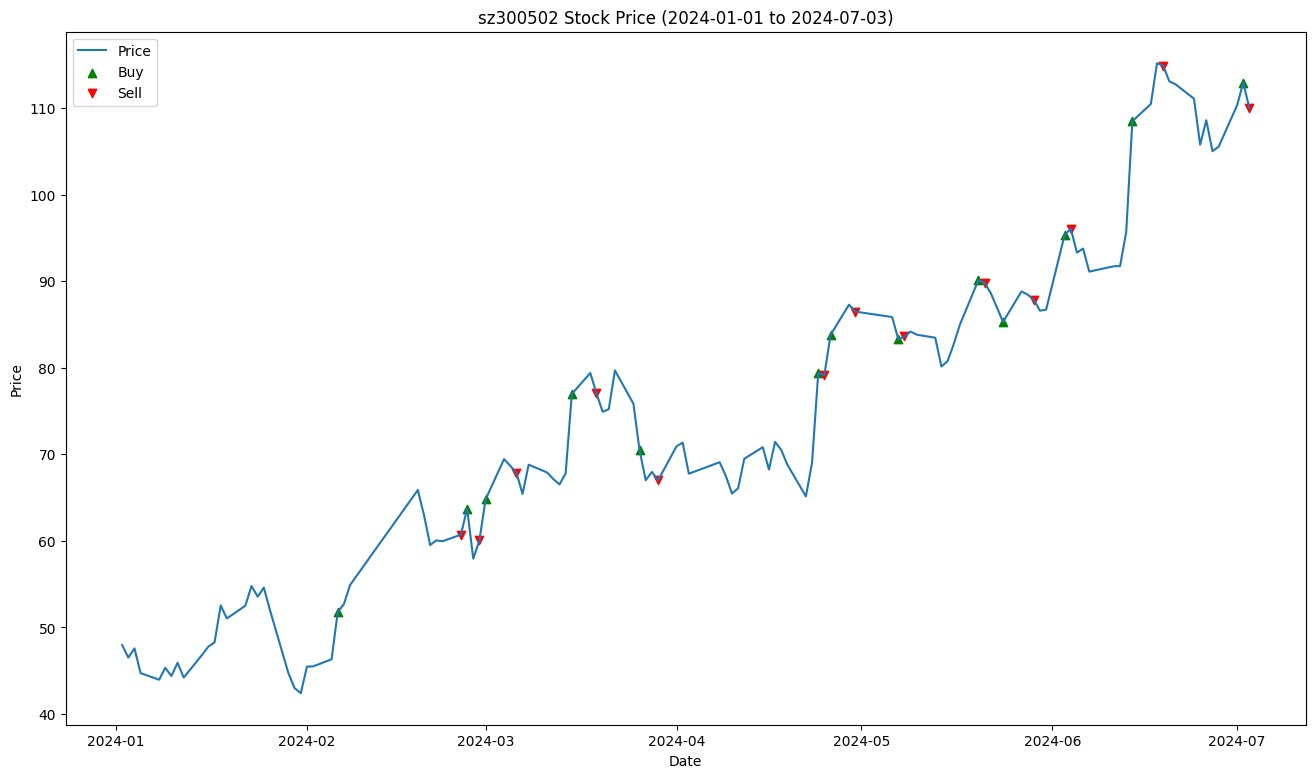

In [15]:
if __name__ == '__main__':
    main()